# Preprocessing

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Remove irrelevent features, fill NaN, reset index, set dtypes
titanic = pd.read_csv('titanic_train.csv')
del titanic['Name']
del titanic['Cabin']
del titanic['Ticket']
titanic = titanic.set_index('PassengerId')
titanic = titanic.fillna('0')
titanic.Age = titanic.Age.astype('int64')
titanic.head()

"""
#method to perform onehotencoding within pandas
titanicdumm = pd.get_dummies(titanic)
titanicdumm.head()

x= pd.cut(titanic.Fare, [0,15,31,150, 600], labels = [0, 1, 2, 3])
x = pd.get_dummies(x)
x.columns  = ['poor','middle', 'rich', 'moneybags']
frames = [titanicdumm, x]
titanic = pd.concat(frames, axis = 1)
del titanic['Fare']
titanic.head()"""

#Change categorical variables to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic.Sex = le.fit_transform(titanic.Sex)
titanic.Embarked = le.fit_transform(titanic.Embarked)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S


Maybe a logisttic regr Age, SibSp, Gender to start out?

# Data Analysis

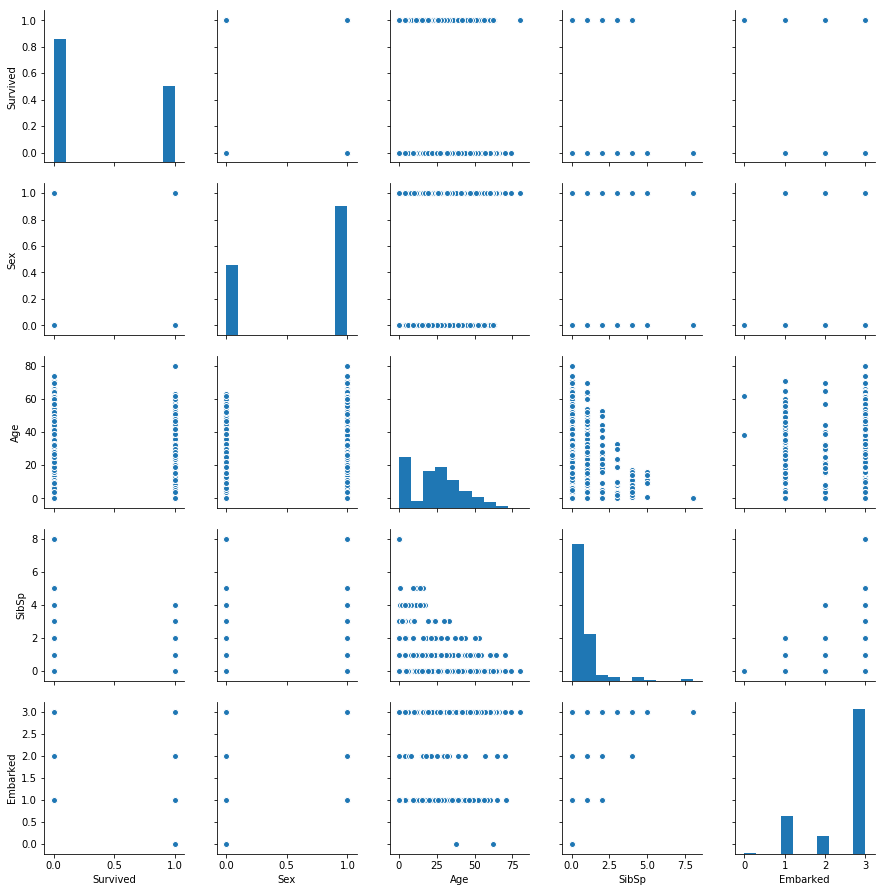

In [5]:
df = titanic.drop(['Pclass','Parch','Fare'], axis = 1)
sns.pairplot(df)


### Things to look at:

Subcombinations of age,  gender, sibsp,

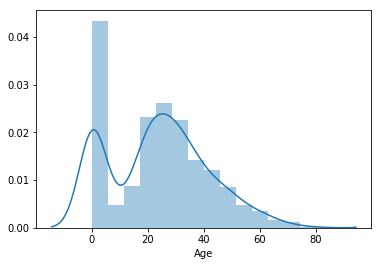

In [6]:
sns.distplot(df['Age'])

In [7]:
df.head()

,Survived,Sex,Age,SibSp,Embarked
PassengerId,,,,,
1,0,1,22,1,3
2,1,0,38,1,1
3,1,0,26,0,3
4,1,0,35,1,3
5,0,1,35,0,3


# Logisitic Regression

In [8]:
#Use all features in train test split
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y)

#instantiate logistic regressor and fit to training data. Accuracy_score is testing measure.
from sklearn.linear_model import LogisticRegressionCV
log  = LogisticRegressionCV()
log.fit(X_train, y_train)
log.score(X_test, y_test)


### Will changing feature inputs boost accuracy?


In [10]:
for x in range(1,5):
    l = LogisticRegressionCV()
    l.fit(X_train.iloc[:,:x], y_train.values)
    print('The score from Sex to ', X.columns[x-1], ':', l.score(X_test.iloc[:, :x], y_test.values))

The score from Sex to  Sex : 0.77130044843
The score from Sex to  Age : 0.77130044843
The score from Sex to  SibSp : 0.780269058296
The score from Sex to  Embarked : 0.780269058296


In [11]:
for x in range(0,4):
    l = LogisticRegressionCV()
    l.fit(X_train.iloc[:,x:], y_train.values)
    print('The score from ',X.columns[x],'to Embarked:', l.score(X_test.iloc[:,x:], y_test.values))

The score from  Sex to Embarked: 0.780269058296
The score from  Age to Embarked: 0.609865470852
The score from  SibSp to Embarked: 0.609865470852
The score from  Embarked to Embarked: 0.609865470852


#### The highest scoring models have all of the data. Need to make sure that the Logistic regressor is being reset each pass through the loop

We can also see that gender creates a significant accuracy boost. classifiers dropped saw an 18% drop in accuracy without the gender info. We will need a more robust method in the future to test the benefit of adding a feature into the model.


VERY INFORMATIONAL: GENDER and EMBARKED


## Logistic Regression on Age in each of the Sex SubSets

In [12]:
both = df.loc[:,['Survived', 'Sex', 'Age']]
men = both[both.Sex ==1]
women = both[both.Sex ==0]


sns.regplot(men.Age, men.Survived, x_bins = [0,20,40,60,80,100], logistic = True, y_jitter = .01)
plt.title('MEN')

Text(0.5,1,'WOMEN')

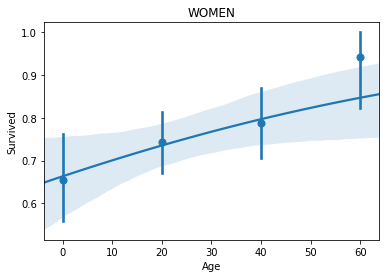

In [14]:
sns.regplot(women.Age, women.Survived,  x_bins = [0,20,40,60,80,100], logistic = True, y_jitter = .01)
plt.title('WOMEN')

# Logistic Regression Decision Boundaries

### Age vs Embarked
If your embarked status is in [2,3] youre dead.

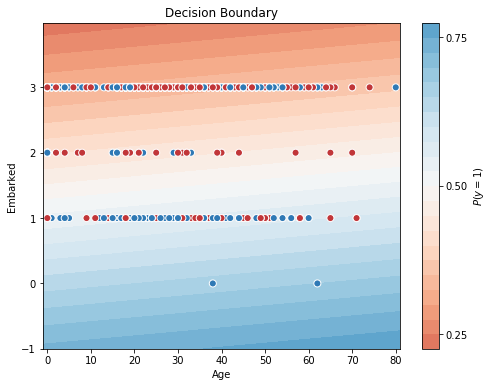

In [24]:
from VisualFuncs import Visual_Logistic

l = LogisticRegressionCV()
l.fit(X.iloc[:,[1,3]], y)
Visual_Logistic(X.iloc[:,[1,3]], y, l)
    

## Age vs Gender
If youre a man... youre dead.

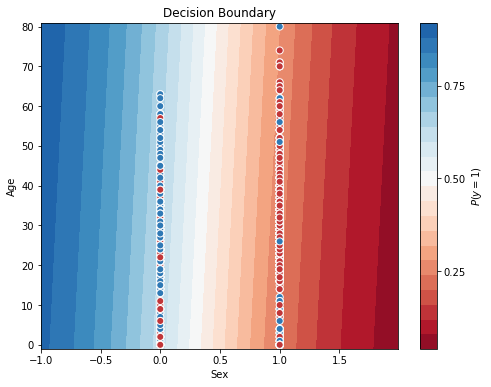

In [23]:
l = LogisticRegressionCV()
l.fit(X.iloc[:,[0,1]], y)
Visual_Logistic(X.iloc[:,[0,1]], y, l)

## Sib Sp vs Embarked
More siblings means more likely to be dead.

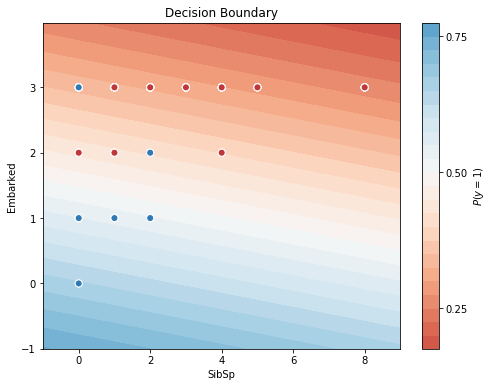

In [25]:
l = LogisticRegressionCV()
l.fit(X.iloc[:,[2,3]], y)
Visual_Logistic(X.iloc[:,[2,3]], y, l)

# Decision Trees